In [1]:
import numpy as np 
import pandas as pd 

import requests

In [2]:
# importing the countries
url = 'https://api.worldbank.org/countries?format=json&per_page=300'

response = requests.get(url)
response.status_code

200

In [3]:
data = response.json()
print(data[0])
print(len(data))

# 1 -> metadata 
# 2-> Actualdata 



{'page': 1, 'pages': 1, 'per_page': '300', 'total': 296}
2


In [4]:
countries = data[1]
countries = pd.DataFrame(countries)

In [5]:
countries

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
2,AFG,AF,Afghanistan,"{'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Midd...","{'id': 'MNA', 'iso2code': 'XQ', 'value': 'Midd...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228
3,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
4,AFW,ZI,Africa Western and Central,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
...,...,...,...,...,...,...,...,...,...,...
291,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
292,YEM,YE,"Yemen, Rep.","{'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Midd...","{'id': 'MNA', 'iso2code': 'XQ', 'value': 'Midd...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Sana'a,44.2075,15.352
293,ZAF,ZA,South Africa,"{'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-...","{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Pretoria,28.1871,-25.746
294,ZMB,ZM,Zambia,"{'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-...","{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Lusaka,28.2937,-15.3982


In [6]:
countries["region"]=countries["region"].apply(lambda x:x["value"])

In [7]:
countries["incomeLevel"] = countries["incomeLevel"].apply(lambda x:x["value"])

In [8]:
countries["lendingType"] = countries["lendingType"].apply(lambda x:x["value"])

In [9]:
countries.drop(columns=["adminregion","lendingType"], inplace=True)

In [10]:
countries.drop(columns=["capitalCity"], inplace=True)

In [11]:
countries.rename(columns={'iso2Code': 'country_id'}, inplace=True)

In [12]:
countries

,id,country_id,name,region,incomeLevel,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,High income,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,Aggregates,,
2,AFG,AF,Afghanistan,"Middle East, North Africa, Afghanistan & Pakistan",Low income,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,Aggregates,,
4,AFW,ZI,Africa Western and Central,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...
291,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,Aggregates,,
292,YEM,YE,"Yemen, Rep.","Middle East, North Africa, Afghanistan & Pakistan",Low income,44.2075,15.352
293,ZAF,ZA,South Africa,Sub-Saharan Africa,Upper middle income,28.1871,-25.746
294,ZMB,ZM,Zambia,Sub-Saharan Africa,Lower middle income,28.2937,-15.3982


In [13]:
countries["region"].unique()

array(['Latin America & Caribbean ', 'Aggregates',
       'Middle East, North Africa, Afghanistan & Pakistan',
       'Sub-Saharan Africa ', 'Europe & Central Asia',
       'East Asia & Pacific', 'South Asia', 'North America'], dtype=object)

In [14]:
countries[countries["region"] == "Aggregates"]

,id,country_id,name,region,incomeLevel,longitude,latitude
1,AFE,ZH,Africa Eastern and Southern,Aggregates,Aggregates,,
3,AFR,A9,Africa,Aggregates,Aggregates,,
4,AFW,ZI,Africa Western and Central,Aggregates,Aggregates,,
8,ARB,1A,Arab World,Aggregates,Aggregates,,
18,BEA,B4,East Asia & Pacific (IBRD-only countries),Aggregates,Aggregates,,
...,...,...,...,...,...,...,...
269,TSA,T5,South Asia (IDA & IBRD),Aggregates,Aggregates,,
270,TSS,T6,Sub-Saharan Africa (IDA & IBRD countries),Aggregates,Aggregates,,
278,UMC,XT,Upper middle income,Aggregates,Aggregates,,
288,WLD,1W,World,Aggregates,Aggregates,,


In [15]:
# code for indicators 
base_url = "https://api.worldbank.org/v2/indicators?format=json"
response = requests.get(base_url)
response.status_code

200

In [16]:
indicators_data = response.json()

In [17]:
indicators_data[0]

{'page': 1, 'pages': 587, 'per_page': '50', 'total': 29323}

In [18]:
pd.DataFrame(indicators_data[1])

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of data from Nation...,"[{'id': '11', 'value': 'Poverty '}]"
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
5,1.0.HCount.Vul4to10,Vulnerable ($4-10 a day) Headcount,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
6,1.0.PGap.1.90usd,Poverty Gap ($1.90 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty gap captures the mean aggregate in...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
7,1.0.PGap.2.5usd,Poverty Gap ($2.50 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty gap captures the mean aggregate in...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
8,1.0.PGap.Poor4uds,Poverty Gap ($4 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty gap captures the mean aggregate in...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
9,1.0.PSev.1.90usd,Poverty Severity ($1.90 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty severity index combines informatio...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"


In [19]:
# all_dfs = []

# for i in range(1, 588):
#     url = f"https://api.worldbank.org/v2/indicators?format=json&per_page=500&page={i}"
#     response = requests.get(url)

#     if response.status_code == 200:
#         data = response.json()

#         # 🔹 Safety check
#         if not data or len(data) < 2 or not data[1]:
#             print(f"No data at page {i}")
#             continue

#         indicators = data[1]

#         df = pd.DataFrame([
#             {
#                 "id": item.get("id"),
#                 "name": item.get("name")
#             }
#             for item in indicators
#         ])

#         all_dfs.append(df)
#         print(f"Page {i}: {len(df)} indicators collected")

#     else:
#         print(f"Failed to fetch page {i}, status code {response.status_code}")


In [20]:
# final_df = pd.concat(all_dfs, ignore_index = True)

NameError: name 'all_dfs' is not defined

In [ ]:
# final_df.to_csv("final_df.csv")

In [ ]:
# extract value for indicators under the domain for each country

In [21]:
indicator_groups = {
    "economic_activity_growth": [
        "NY.GDP.MKTP.KD.ZG",  # GDP growth (annual %)
        "NY.GDP.PCAP.CD",      # GDP per capita (current US$)
    ],
    "labour_market_indicators": [
        "SL.UEM.TOTL.ZS",      # Unemployment total
        "SL.UEM.1524.ZS",      # Unemployment youth total (ages 15–24)
        "SL.TLF.TOTL.IN",      # Labour force, total
    ],
    "trade_globalization": [
        "NE.EXP.GNFS.CD",      # Exports of goods and services (current US$)
        "NE.IMP.GNFS.CD",      # Imports of goods and services (current US$)
    ],
    "poverty_inequality": [
        "SI.POV.NAHC",         # Poverty headcount ratio at national poverty lines (% of population)
        "SI.POV.GINI",         # Gini index (measure of income inequality)
    ],
    "environmental_indicators": [
        "EG.FEC.RNEW.ZS",      # Renewable energy consumption (% of total final energy consumption)
        "AG.LND.FRST.ZS",      # Forest area (% of land area)
    ],
    "health_indicators": [
        "SP.DYN.LE00.IN",      # Life expectancy at birth
        "SP.DYN.IMRT.IN",      # Infant mortality rate
        "SH.H2O.BASW.ZS",      # Access to at least basic water services (% of population)
        "SH.XPD.CHEX.GD.ZS",   # Current health expenditure (% of GDP)
        "SH.IMM.IDPT",         # Immunization, DPT (% of children ages 12–23 months)
        "SH.IMM.MEAS",         # Immunization, measles (% of children ages 12–23 months)
        "SH.MMR.RISK.ZS",      # Risk of maternal death
        "SH.DTH.COMM.ZS",      # Deaths from communicable diseases (% of total)
        "SH.TBS.INCD",         # Tuberculosis incidence (per 100,000 people)
        "SH.STA.BRTC.ZS",      # Births attended by skilled health staff (%)
        "SH.STA.MMRT",         # Maternal mortality ratio (modeled estimate, per 100,000 live births)
        "SP.POP.65UP.TO.ZS",   # Population ages 65 and above (% of total population)
        "SH.HIV.INCD.ZS",      # HIV incidence rate (per 1,000 uninfected population ages 15–49)
    ],
    "technology_indicators": [
        "IT.NET.USER.ZS",      # Individuals using the Internet (% of population)
        "IT.CEL.SETS.P2",      # Mobile cellular subscriptions (per 100 people)
    ],
}

In [22]:
for i, j in indicator_groups.items():
    # print(i)
    print(j)


['NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD']
['SL.UEM.TOTL.ZS', 'SL.UEM.1524.ZS', 'SL.TLF.TOTL.IN']
['NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD']
['SI.POV.NAHC', 'SI.POV.GINI']
['EG.FEC.RNEW.ZS', 'AG.LND.FRST.ZS']
['SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'SH.H2O.BASW.ZS', 'SH.XPD.CHEX.GD.ZS', 'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.MMR.RISK.ZS', 'SH.DTH.COMM.ZS', 'SH.TBS.INCD', 'SH.STA.BRTC.ZS', 'SH.STA.MMRT', 'SP.POP.65UP.TO.ZS', 'SH.HIV.INCD.ZS']
['IT.NET.USER.ZS', 'IT.CEL.SETS.P2']


In [23]:
import time
import requests
import pandas as pd

base_url = "https://api.worldbank.org/v2/countries/all/indicators/{}?format=json&per_page=1000&page={}"

category_dataframes = {}

for category, indicators in indicator_groups.items():
    print(f"\nFetching information for category: {category}")
    all_dfs_for_category = []

    for indicator_code in indicators:
        print(f"Fetching indicator: {indicator_code}")
        page = 1

        while True:
            url = base_url.format(indicator_code, page)
            response = requests.get(url)

            # 🔹 Check HTTP status
            if response.status_code != 200:
                print(f"Failed request for {indicator_code} page {page}")
                break

            # 🔹 Check empty response
            if not response.text.strip():
                print(f"Empty response for {indicator_code} page {page}")
                break

            # 🔹 Safe JSON parsing
            try:
                data = response.json()
            except ValueError:
                print(f"Invalid JSON for {indicator_code} page {page}")
                break

            # 🔹 Check data structure
            if not data or len(data) < 2 or not data[1]:
                print(f"No data for {indicator_code} page {page}")
                break

            total_pages = data[0]["pages"]
            records = data[1]

            df = pd.json_normalize(records)
            df = df[
                [
                    "country.id",
                    "country.value",
                    "indicator.id",
                    "indicator.value",
                    "date",
                    "value",
                ]
            ].rename(
                columns={
                    "country.id": "country_id",
                    "country.value": "country_name",
                    "indicator.id": "indicator_id",
                    "indicator.value": "indicator_name",
                    "date": "year",
                }
            )

            # 🔹 Filter years safely
            df["year"] = pd.to_numeric(df["year"], errors="coerce")
            df = df[df["year"] > 2015]

            all_dfs_for_category.append(df)

            if page >= total_pages:
                break

            page += 1
            time.sleep(0.3)  # rate-limit protection

    if all_dfs_for_category:
        combined_df = pd.concat(all_dfs_for_category, ignore_index=True)
        category_dataframes[category] = combined_df
        print(f"Total rows collected for {category}: {len(combined_df)}")
    else:
        print(f"No data collected for {category}")

print("\n✅ Data Fetching Completed Successfully")



Fetching information for category: economic_activity_growth
Fetching indicator: NY.GDP.MKTP.KD.ZG
Fetching indicator: NY.GDP.PCAP.CD
Total rows collected for economic_activity_growth: 4788

Fetching information for category: labour_market_indicators
Fetching indicator: SL.UEM.TOTL.ZS
Fetching indicator: SL.UEM.1524.ZS
Fetching indicator: SL.TLF.TOTL.IN
Total rows collected for labour_market_indicators: 7182

Fetching information for category: trade_globalization
Fetching indicator: NE.EXP.GNFS.CD
Fetching indicator: NE.IMP.GNFS.CD
Total rows collected for trade_globalization: 4788

Fetching information for category: poverty_inequality
Fetching indicator: SI.POV.NAHC
Fetching indicator: SI.POV.GINI


C:\Users\knigh\AppData\Local\Temp\ipykernel_19080\260109024.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(all_dfs_for_category, ignore_index=True)


Total rows collected for poverty_inequality: 4788

Fetching information for category: environmental_indicators
Fetching indicator: EG.FEC.RNEW.ZS
Fetching indicator: AG.LND.FRST.ZS
Total rows collected for environmental_indicators: 4788

Fetching information for category: health_indicators
Fetching indicator: SP.DYN.LE00.IN
Fetching indicator: SP.DYN.IMRT.IN
Fetching indicator: SH.H2O.BASW.ZS
Fetching indicator: SH.XPD.CHEX.GD.ZS
Fetching indicator: SH.IMM.IDPT
Fetching indicator: SH.IMM.MEAS
Failed request for SH.IMM.MEAS page 5
Fetching indicator: SH.MMR.RISK.ZS
Fetching indicator: SH.DTH.COMM.ZS
Fetching indicator: SH.TBS.INCD
Fetching indicator: SH.STA.BRTC.ZS
Fetching indicator: SH.STA.MMRT
Fetching indicator: SP.POP.65UP.TO.ZS
Fetching indicator: SH.HIV.INCD.ZS
Total rows collected for health_indicators: 29286

Fetching information for category: technology_indicators
Fetching indicator: IT.NET.USER.ZS
Fetching indicator: IT.CEL.SETS.P2
Total rows collected for technology_indicato

In [24]:
base_url = "https://api.worldbank.org/countries/all/indicators/IT.NET.USER.ZS?format=json&per_page=1000&page=1"

In [25]:
response = requests.get(base_url)

In [26]:
pd.json_normalize(response.json()[1])

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2024,28.8,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),ZH,Africa Eastern and Southern
1,AFE,2023,27.8,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),ZH,Africa Eastern and Southern
2,AFE,2022,26.8,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),ZH,Africa Eastern and Southern
3,AFE,2021,25.0,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),ZH,Africa Eastern and Southern
4,AFE,2020,23.5,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),ZH,Africa Eastern and Southern
...,...,...,...,...,...,...,...,...,...,...
995,HPC,2004,NaN,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),XE,Heavily indebted poor countries (HIPC)
996,HPC,2003,NaN,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),XE,Heavily indebted poor countries (HIPC)
997,HPC,2002,NaN,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),XE,Heavily indebted poor countries (HIPC)
998,HPC,2001,NaN,,,0,IT.NET.USER.ZS,Individuals using the Internet (% of population),XE,Heavily indebted poor countries (HIPC)


In [27]:
economic_activity= category_dataframes.get("economic_activity_growth", pd.DataFrame())
labour_market_jobs= category_dataframes.get("labour_market_indicators", pd.DataFrame())
trade_globalization= category_dataframes.get("trade_globalization", pd.DataFrame())
poverty_inequality= category_dataframes.get("poverty_inequality", pd.DataFrame())
environmental_indicators= category_dataframes.get("environmental_indicators", pd.DataFrame())
health_indicators= category_dataframes.get("health_indicators", pd.DataFrame())
technology_indicators= category_dataframes.get("technology_indicators", pd.DataFrame())

In [28]:
labour_market_jobs

,country_id,country_name,indicator_id,indicator_name,year,value
0,ZH,Africa Eastern and Southern,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2024,7.772705e+00
1,ZH,Africa Eastern and Southern,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2023,7.806411e+00
2,ZH,Africa Eastern and Southern,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2022,7.985202e+00
3,ZH,Africa Eastern and Southern,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2021,8.577385e+00
4,ZH,Africa Eastern and Southern,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2020,8.191395e+00
...,...,...,...,...,...,...
7177,ZW,Zimbabwe,SL.TLF.TOTL.IN,"Labor force, total",2020,5.813811e+06
7178,ZW,Zimbabwe,SL.TLF.TOTL.IN,"Labor force, total",2019,5.773237e+06
7179,ZW,Zimbabwe,SL.TLF.TOTL.IN,"Labor force, total",2018,5.656990e+06
7180,ZW,Zimbabwe,SL.TLF.TOTL.IN,"Labor force, total",2017,5.548177e+06


In [29]:
economic= pd.merge(economic_activity, countries, on ="country_id", how="inner")
labour_market = pd.merge(labour_market_jobs, countries, on ="country_id", how="inner")
trade= pd.merge(trade_globalization, countries, on ="country_id", how="inner")
poverty= pd.merge(poverty_inequality, countries, on ="country_id", how="inner")
environment= pd.merge(environmental_indicators, countries, on ="country_id", how="inner")
health=pd.merge(health_indicators, countries, on ="country_id", how="inner")
technology=pd.merge(technology_indicators, countries, on ="country_id", how="inner")

In [30]:
economic

,country_id,country_name,indicator_id,indicator_name,year,value,id,name,region,incomeLevel,longitude,latitude
0,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2024,2.763839,AFE,Africa Eastern and Southern,Aggregates,Aggregates,,
1,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2023,1.931160,AFE,Africa Eastern and Southern,Aggregates,Aggregates,,
2,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2022,3.722717,AFE,Africa Eastern and Southern,Aggregates,Aggregates,,
3,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2021,4.578772,AFE,Africa Eastern and Southern,Aggregates,Aggregates,,
4,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2020,-2.817572,AFE,Africa Eastern and Southern,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...,...,...,...,...,...
4783,ZW,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),2020,2059.674454,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,31.0672,-17.8312
4784,ZW,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),2019,2184.329239,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,31.0672,-17.8312
4785,ZW,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),2018,2270.895319,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,31.0672,-17.8312
4786,ZW,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),2017,3445.449410,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,31.0672,-17.8312


In [31]:
economic.drop(columns=["indicator_id","name","id"], inplace=True)
trade.drop(columns=["indicator_id","name","id"], inplace=True)
labour_market.drop(columns=["indicator_id","name","id"], inplace=True)
poverty.drop(columns=["indicator_id","name","id"], inplace=True)
environment.drop(columns=["indicator_id","name","id"], inplace=True)
health.drop(columns=["indicator_id","name","id"], inplace=True)
technology.drop(columns=["indicator_id","name","id"], inplace=True)

In [34]:
health

,country_id,country_name,indicator_name,year,value,region,incomeLevel,longitude,latitude
0,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2024,NaN,Aggregates,Aggregates,,
1,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2023,65.146154,Aggregates,Aggregates,,
2,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2022,64.487020,Aggregates,Aggregates,,
3,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2021,62.979999,Aggregates,Aggregates,,
4,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2020,63.766484,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...,...,...
29281,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2020,1.900000,Sub-Saharan Africa,Lower middle income,31.0672,-17.8312
29282,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2019,2.300000,Sub-Saharan Africa,Lower middle income,31.0672,-17.8312
29283,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2018,2.700000,Sub-Saharan Africa,Lower middle income,31.0672,-17.8312
29284,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2017,3.600000,Sub-Saharan Africa,Lower middle income,31.0672,-17.8312


In [ ]:
# economic.to_csv("economic.csv")
# trade.to_csv("trade.csv")
# labour_market.to_csv("labour_market.csv")
# poverty.to_csv("poverty.csv")
# environment.to_csv("environment.csv")
# health.to_csv("health.csv")
# technology.to_csv("technology.csv")

In [ ]:
# economic.to_csv("economic.csv", index=False)

In [35]:
df_wide = health.pivot_table(index=["country_name","year"],
                             columns="indicator_name",
                             values="value"
                             )

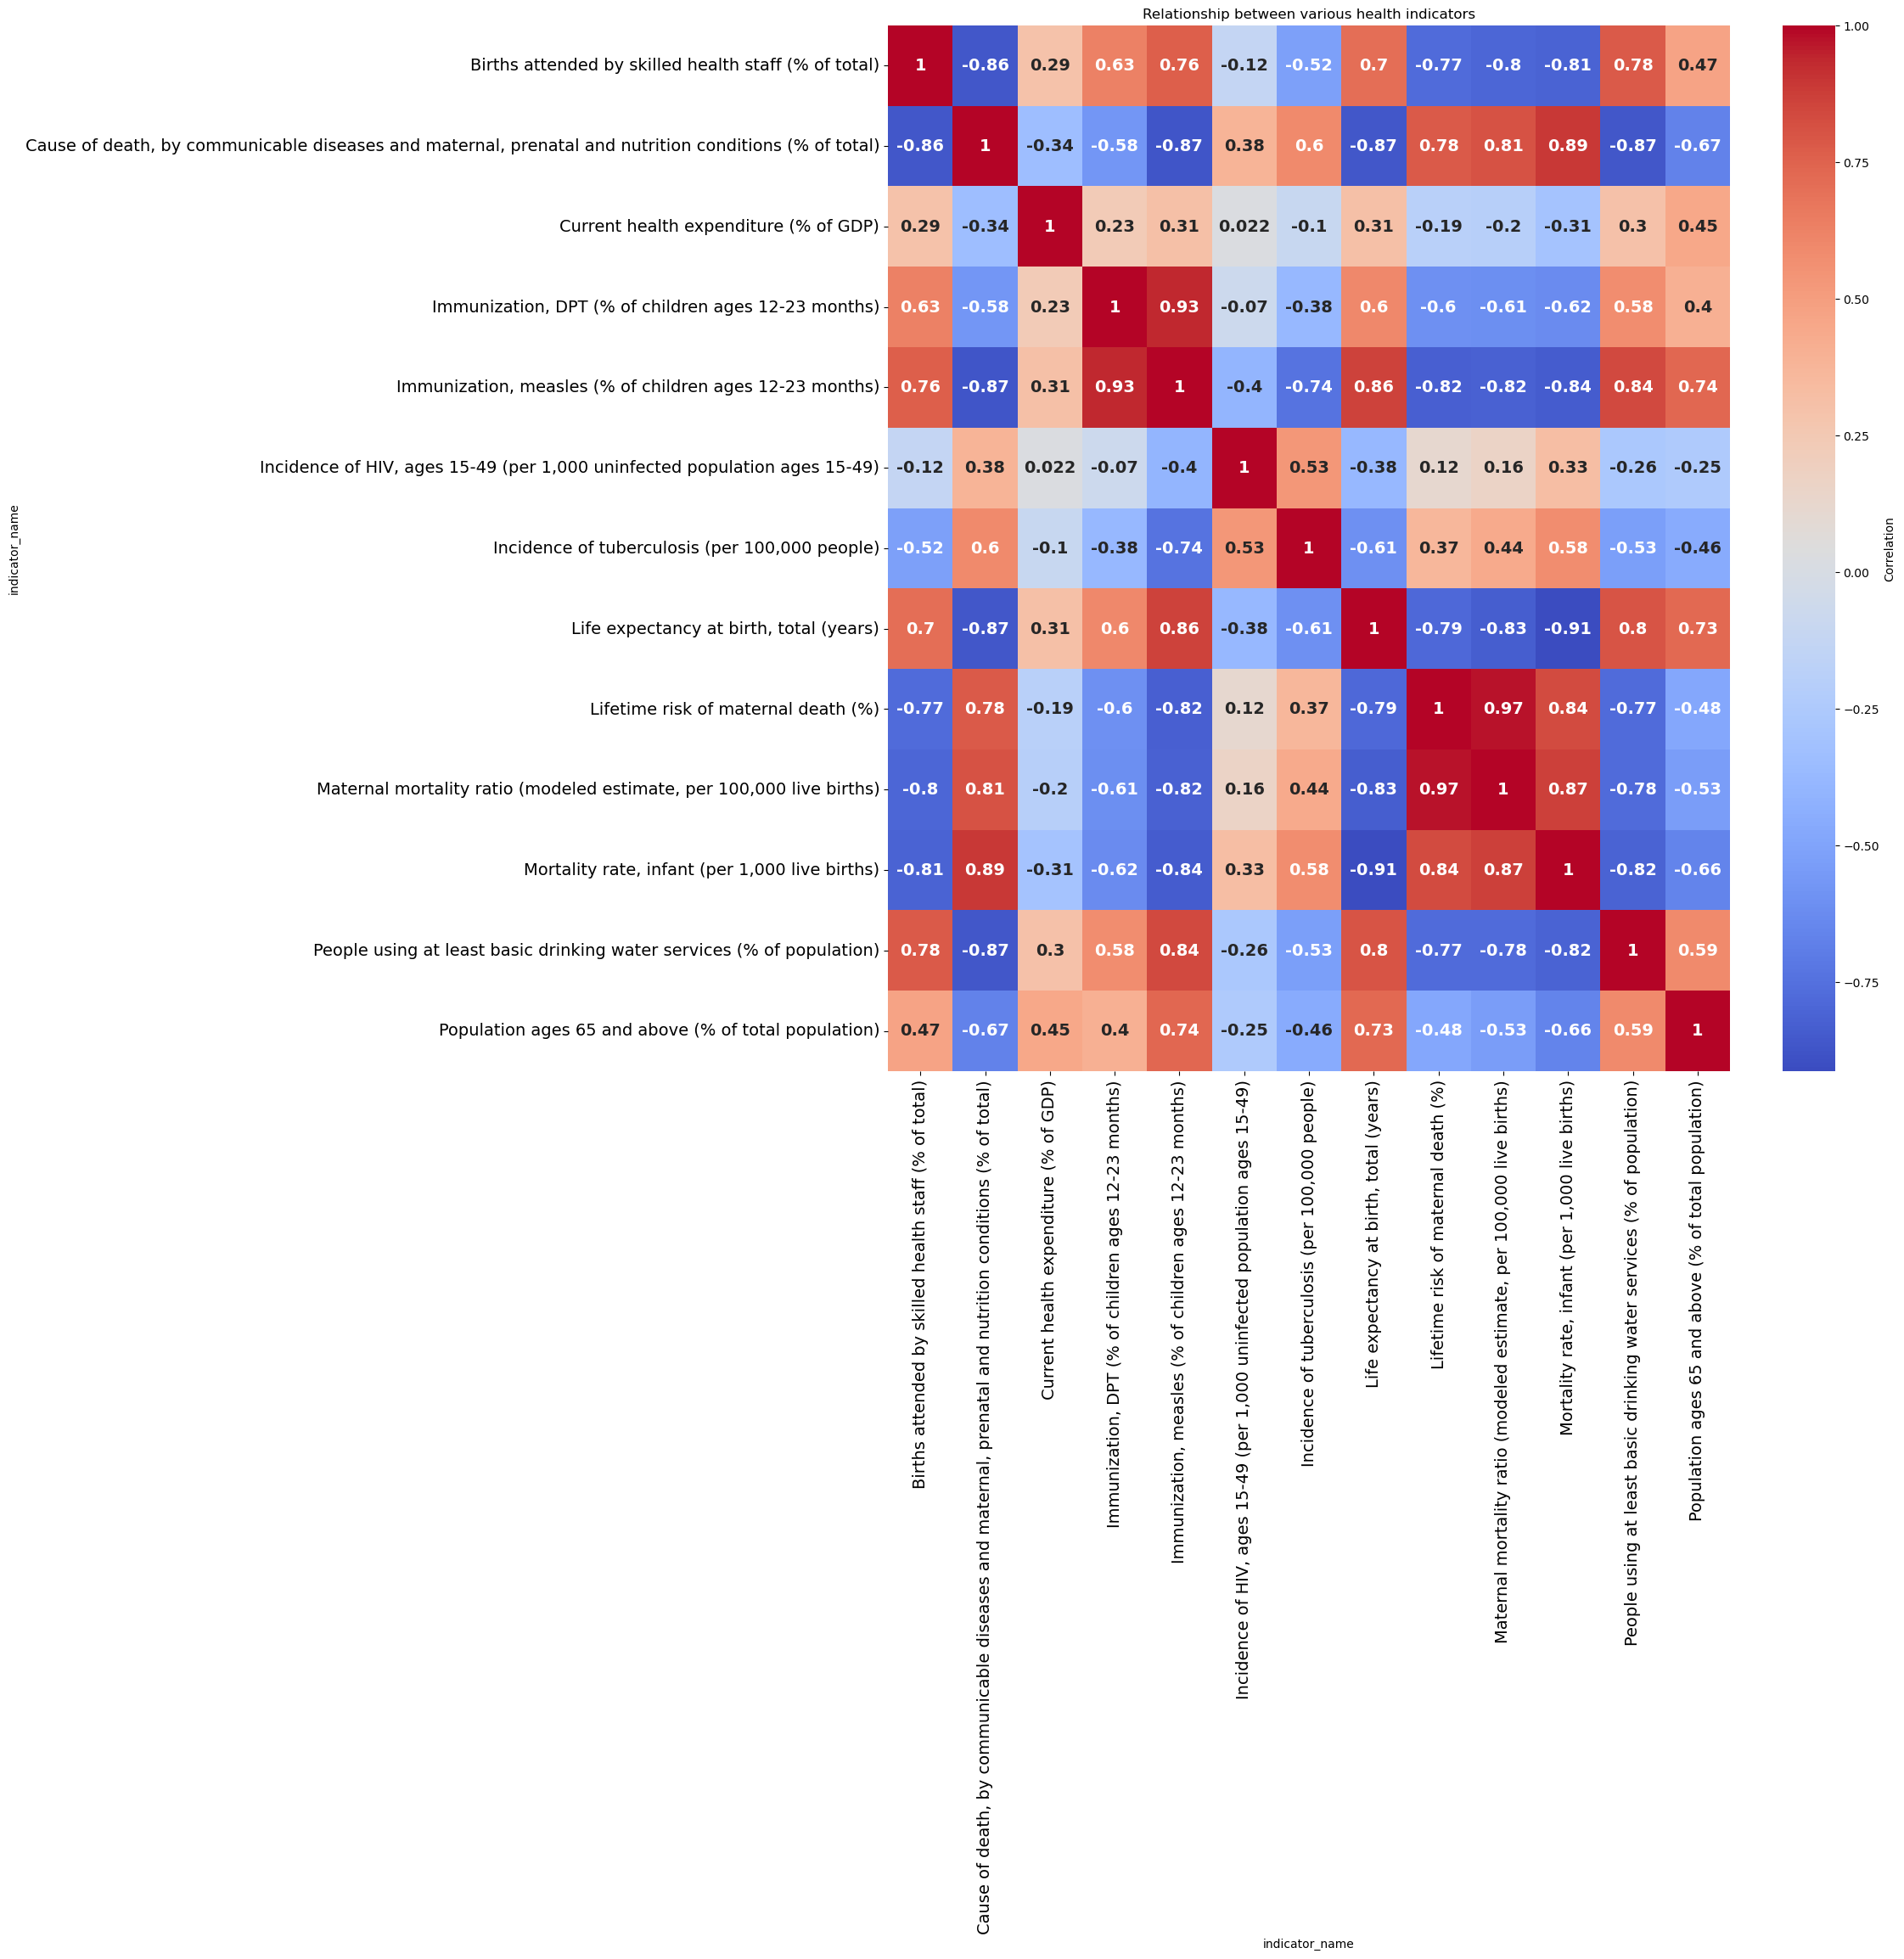

In [37]:
df_wide = health.pivot_table(index=["country_name","year"],
                             columns="indicator_name",
                             values="value"
                             )
corr= df_wide.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16), facecolor="none")
ax= sns.heatmap(
    corr,
    annot=True,
    cmap= "coolwarm",
    cbar_kws= {"label":"Correlation"},
    annot_kws= {"fontsize":14, "fontweight":"bold"}
)
plt.title("Relationship between various health indicators")

ax.tick_params(axis="x",labelsize=14)
ax.tick_params(axis="y",labelsize=14)
plt.show()

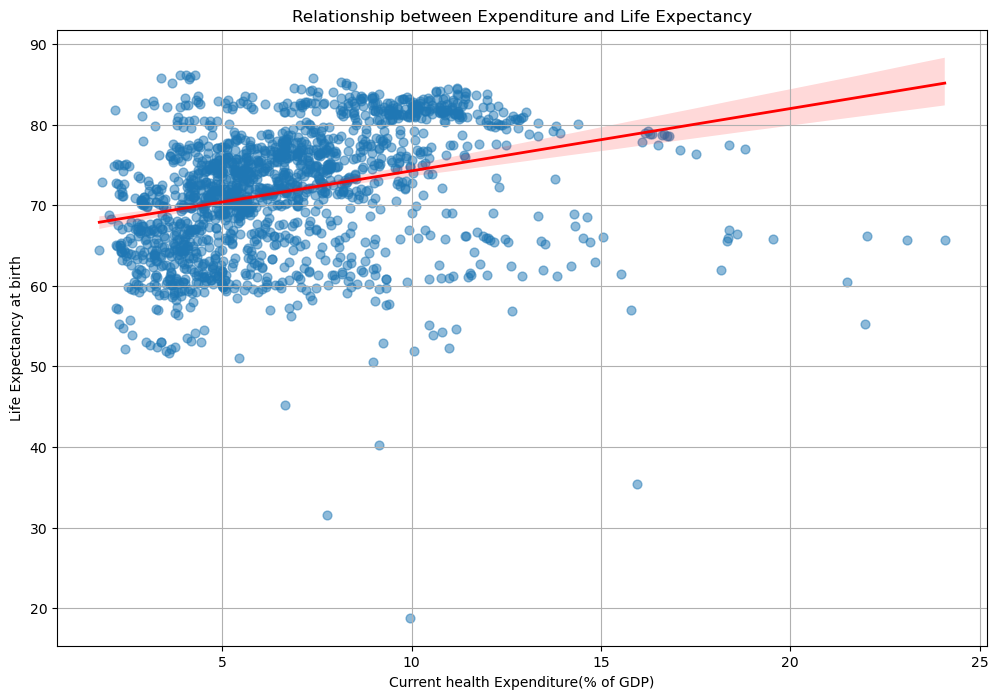

In [38]:
df_pivot= health.pivot(index=["country_name", "year"], columns="indicator_name", values="value").reset_index()

plt.figure(figsize=(12,8), facecolor="none")

ax=sns.regplot(data=df_pivot,
               x="Current health expenditure (% of GDP)",
               y="Life expectancy at birth, total (years)",
               scatter_kws= {"alpha":0.5, "s":40},
               line_kws={"color":"red","lw":2}
               )

plt.title("Relationship between Expenditure and Life Expectancy")
plt.xlabel("Current health Expenditure(% of GDP)")
plt.ylabel("Life Expectancy at birth")
plt.grid(True)
plt.show()